<h2>Identification of Non-Responsive Pixels</h2>

In [31]:
#Load libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import glob  

In [32]:
#load image
img_loc = (r"C:\Users\A8DPDZZ\Documents\Test Development\ImgAnalysis\artifactImage.jpg")
img = cv2.imread(img_loc)
print(img.size, img.dtype) #check image information

160080 uint8


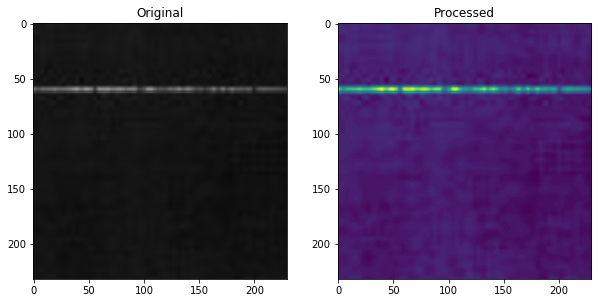

In [33]:
#Image Prep
img_gry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blr = cv2.GaussianBlur(img_gry,(5,5),0)

f, ax = plt.subplots(2,2,figsize=(10,7))
plt.subplot(121),plt.imshow(img),plt.title('Original')
#plt.xticks([]), plt.yticks([]) #remove ticks if necessary
plt.subplot(122),plt.imshow(img_blr),plt.title('Processed')
#plt.xticks([]), plt.yticks([]) #remove ticks if necessary
plt.show()

In [34]:
#Checks image for max and min pixel values
print("Greatest pixel value:",np.ndarray.max(img_gry),"Least pixel value:",np.ndarray.min(img_gry))

Greatest pixel value: 146 Least pixel value: 9


In [35]:
#Select the whether min or max for dead pixels depending on the thermal target
thresh = np.ndarray.max(img_gry)
locat = np.where(img_gry >= thresh)
print(locat)

(array([60], dtype=int64), array([39], dtype=int64))


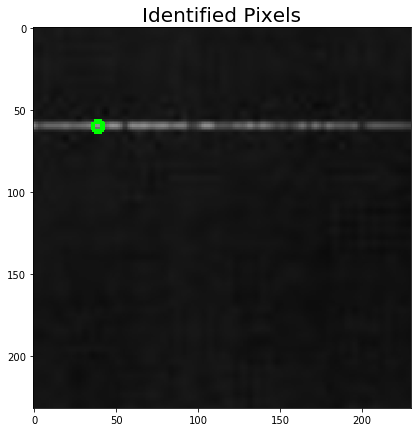

In [36]:
#Locates NR pixel on image
rad = 3
for pt in zip(*locat[::-1]): 
    cv2.circle(img, pt, rad, (0,255,0),2)
f, ax = plt.subplots(1,1,figsize=(10,7))
plt.title('Identified Pixels', fontdict=None, loc='center', pad=None, fontsize = 20)
plt.imshow(img) #plot last image with all points

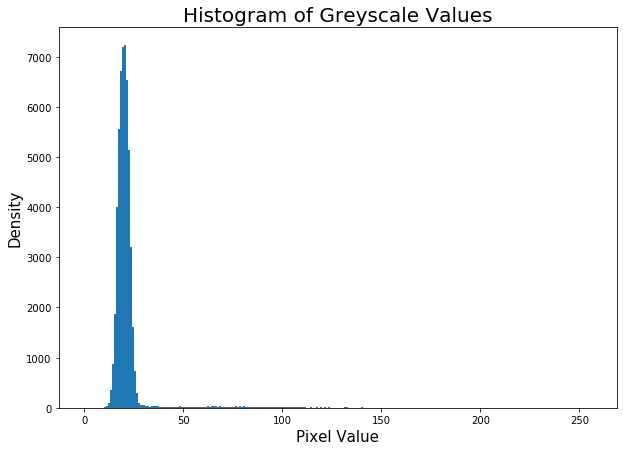

In [37]:
f, ax = plt.subplots(1,1,figsize=(10,7))
plt.title('Histogram of Greyscale Values', fontdict=None, loc='center', pad=None, fontsize=20)
ax.set_xlabel('Pixel Value', fontsize=15)
ax.set_ylabel('Density', fontsize=15)
plt.hist(img_gry.ravel(),256,[0,256])
plt.show()